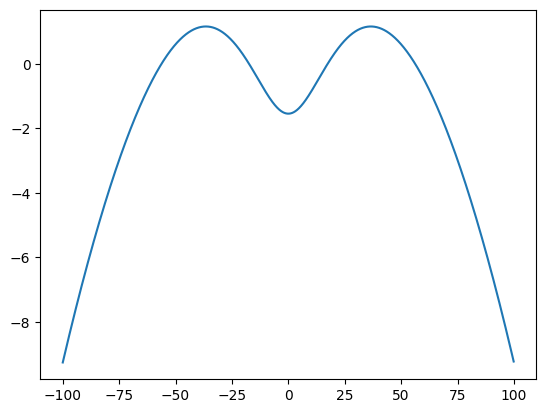

In [21]:
import numpy
import matplotlib.pyplot as plt






#function for gamma
def gamma(Du,Dv,alpha,beta,k):
    Bk = (Du+Dv)*(k**2)+(alpha**2)-beta+1
    Ck = Du*Dv*(k**4)+Du*(k**2)*(alpha**2)+Dv*(k**2)*(1-beta)+(alpha**2)
                                                               
    Yk1 = -0.5*Bk +0.5*(((Bk**2)-(4*Ck))**0.5)
    Yk2 = -0.5*Bk -0.5*(((Bk**2)-(4*Ck))**0.5)
    return Yk1,Yk2

k = -100
Du = 1.6e-3
Dv = Du*11
alpha = 5.2
beta = 9
Ylist = []
Y2list = []
k_list = []
#finding the peak gamma
for i in range(2000):
    Yk1,Yk2 = gamma(Du,Dv,alpha,beta,k)
    Ylist.append(Yk1)
    Y2list.append(Yk2)
    k_list.append(k)
    k+=0.1

plt.plot(k_list,Ylist)
plt.show()





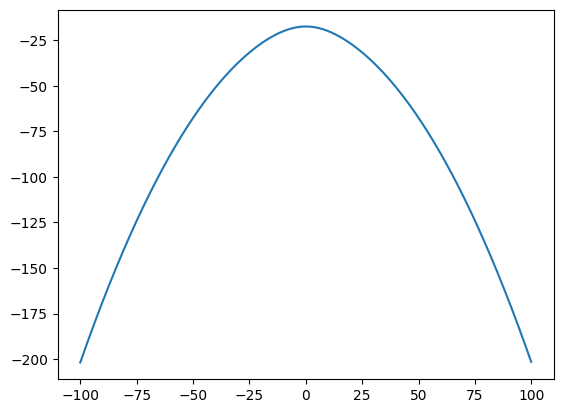

In [22]:
plt.plot(k_list,Y2list)
plt.show()

In [23]:
#derivative for gamma
def gamma_deri(Du,Dv,alpha,beta,k):
    A = Du+Dv
    B = Du-Dv
    C = -2*(alpha**2)-2*beta+2
    D = (alpha**2-beta+1)**2-4*(alpha**2)
    dY1 = -1*A*k + 0.25*(((B**2)*(k**4)+B*C*(k**2)+D)**-0.5)*(4*(B**2)*(k**3)+2*B*C*k)
    dY2 = -1*A*k - 0.25*(((B**2)*(k**4)+B*C*(k**2)+D)**-0.5)*(4*(B**2)*(k**3)+2*B*C*k)
    return dY1,dY2

36.200000000000244 1.1556813229582978 -45.35612932295865
0.0024017275421175377
36.300000000000246 1.1558893805249362 -45.49553738052528
0.001759501098198779
36.40000000000025 1.1560332387452235 -45.635265238745575
0.0011177416689249764
36.50000000000025 1.1561129446347742 -45.77531294463513
0.0004764555173025764
0.0004764555173025764


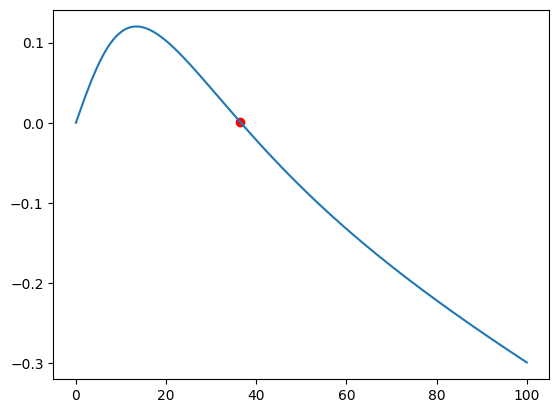

In [24]:
Du = 1.6e-3
Dv = Du*11
alpha =5.2
beta = 9
k = 0
dk = 0.1
i = 1
dy1 = []
dy2 = []
k1=[]
dy=[]
dymin=3
kmin = 3
while (k <= 100):
    dY1,dY2 =  gamma_deri(Du,Dv,alpha,beta,k)
    dy1.append(dY1)
    dy2.append(dY2)
    k1.append(k)
    if(k>=0)and((-0.003<=dY1 <= 0.003)or(-0.003<= dY2 <= 0.003)):
        Yk1,Yk2 = gamma(Du,Dv,alpha,beta,k)
        if (dY1 > 0)and(Yk1 > 0 or Yk2 > 0):
            print(k,Yk1,Yk2)
            print(dY1)
            dy.append(dY1)
            if dY1 < dymin:
                dymin = dY1
                kmin = k


    k+=dk

dy.sort()
print(dy[0])
plt.plot(k1,dy1)
plt.scatter(kmin,dymin,color="red")
plt.show()

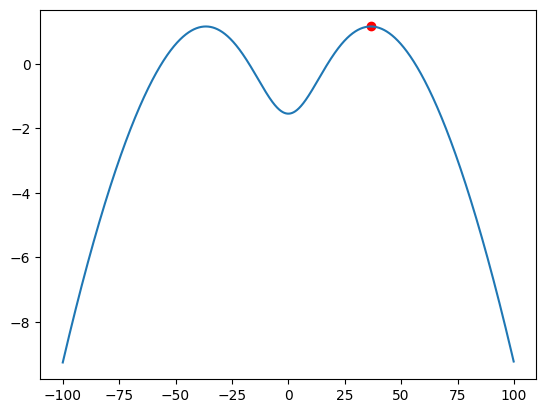

In [25]:
plt.plot(k_list,Ylist)
y1,y2=gamma(Du,Dv,alpha,beta,kmin)
plt.scatter(kmin,y1,color="red")
plt.show()